## Spencer's notes:
Eric's 'planet_moon_star.jl' code calls a package called 'CGS' that is not listed in the Julia repository. I had to make a copy of 'cgs.jl' and 'planet_moon_star.jl' (replacing 'using CGS' with 'include("cgs.jl")). I also had to modify Eric's function to return the map. Currently, it just displays the figure and doesn't return any information.

This homework looks really straightforward. We simply need to vary 'yplanet' and call 'planet_moon_star' to create a lensing map. We then create an image of a circular source with radius R (make a 2D array where 0 = outside the circle and 1 = inside the circle) and convolve it with the lensing map.

The convolving part is really easy. Julia has a function called 'conv2' which does a circular convolution. You pass it two matricies (the lensing map and the 2d array of the circle) and it constructs a convolved image. We then just need to get the max magnification in the convolved image.

In [1]:
using PyPlot
include("planet_moon_star.jl")

INFO: Recompiling stale cache file /astro/users/scw7/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /astro/users/scw7/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


planet_moon_star (generic function with 1 method)

Mass ratio: 1.0e-5
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/

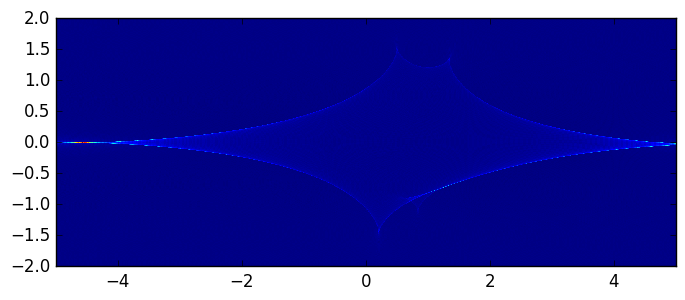

1000x1000 Array{Float64,2}:
 0.957447  0.934783  0.977273  0.977778  …  1.05405   0.902439  1.0     
 1.02273   0.955556  0.914894  1.02381      1.0       0.875     1.05263 
 0.977778  0.954545  0.956522  0.934783     0.897436  1.02564   0.925   
 0.934783  0.956522  0.954545  0.978261     0.948718  0.95122   0.945946
 0.977273  0.956522  0.977273  0.956522     0.928571  1.0       0.886364
 0.956522  0.954545  0.957447  0.954545  …  0.973684  0.926829  1.0     
 0.934783  0.977273  0.977778  0.933333     0.95122   0.973684  0.925   
 0.934783  0.934783  0.955556  0.977778     0.947368  0.95      0.974359
 1.0       0.978261  0.955556  0.977273     0.923077  0.97561   0.972973
 0.934783  0.977273  0.977778  0.895833     1.02564   0.948718  0.95122 
 0.957447  0.933333  1.0       0.933333  …  1.0       0.878049  1.08108 
 0.954545  0.977778  0.914894  1.0          0.837209  1.11111   0.833333
 0.913043  1.02273   0.891304  1.02273      1.0       0.925     0.95    
 ⋮                     

10000
Range of grid, y1: 1.0841886116991581 1.0905843182668487 1.115811388300842 1.1096718262236251
Range of grid, y2: -0.047434164902525694 -0.04150015087321973 0.047434164902525694 0.04154758503812225


In [2]:
yplanet = 1.1
y1moon = 1.0
y2moon = 0.5
eps1 = 1e-5
eps2 = 0.5
lens_map = planet_moon_star(yplanet,y1moon,y2moon,eps1,eps2)

In [15]:
len, len = size(lens_map)
source_map = zeros(Float64, len, len)
for i in 1:len
    for j in 1:len
        source_map[i, j] = 1
    end
end

In [17]:
conv_image = conv2(source_map, lens_map)
maxval = maximum(conv_image)

1.097748610491189e6